Hola

En este documento vamos a hacer el cálculo de Moving Average para nuetsro proyecproyecto 

# Titulo
## 1. Paquetes

In [1]:
#pip install pandas

In [2]:
import pandas as pd #leer nuestros datos

In [3]:
#pip install sklearn.metrics
from sklearn.metrics import mean_squared_error

In [4]:
import matplotlib.pyplot as ptl #gráficas

## 2. Leer datos


In [5]:
datos=pd.read_csv("datos_completos.csv")

In [6]:
datos.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,2,0,23,0.676471,3778,1.988421,2,...,23,0.676471,0.676471,0.676471,3778,3778,3778,1.988421,1.988421,1.988421
1,1,1,1,0,1,27,0.794118,3461,1.821579,2,...,23,0.676471,0.676471,0.676471,3778,3778,3778,1.988421,1.988421,1.988421
2,1,2,1,1,0,28,0.823529,594,0.312632,0,...,23,0.794118,0.676471,0.676471,3461,3778,3778,1.821579,1.988421,1.988421
3,1,3,1,0,0,31,0.911765,848,0.446316,1,...,23,0.823529,0.794118,0.676471,594,3461,3778,0.312632,1.821579,1.988421
4,1,4,1,0,0,37,1.088235,408,0.214737,0,...,27,0.911765,0.823529,0.794118,848,594,3461,0.446316,0.312632,1.821579


In [7]:
datos.shape

(581400, 24)

In [8]:
datos.columns #nombre columnas

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

## 3. Formato a mis datos

In [9]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [10]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,2,0
1,1,1,1,0,1
2,1,2,1,1,0
3,1,3,1,0,0
4,1,4,1,0,0


## 4. Promedios Móviles

### 4.1 Pedir lo del mes pasado

In [11]:
datos_ma['m1_pedir_mes_anterior'] =datos_ma['ventas_totales']

In [12]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior
0,1,0,1,2,0,2
1,1,1,1,0,1,0
2,1,2,1,1,0,1
3,1,3,1,0,0,0
4,1,4,1,0,0,0


### 4.2 Pedir el promedio de 2 meses anteriores

In [13]:
datos_ma['m2_pedir_2_meses_anteriores'] = datos_ma.groupby(['pdv_id', 'sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)

In [14]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores
0,1,0,1,2,0,2,NaN
1,1,1,1,0,1,0,1.0
2,1,2,1,1,0,1,0.5
3,1,3,1,0,0,0,0.5
4,1,4,1,0,0,0,0.0


### 4.3 Pedir el promedio de 3 meses anteriores

In [15]:
datos_ma['m3_pedir_3_meses_anteriores'] = datos_ma.groupby(['pdv_id', 'sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)

In [16]:
datos_ma.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
0,1,0,1,2,0,2,NaN,NaN
1,1,1,1,0,1,0,1.0,NaN
2,1,2,1,1,0,1,0.5,1.000000
3,1,3,1,0,0,0,0.5,0.333333
4,1,4,1,0,0,0,0.0,0.333333


## 5. Cálculo de errores

### 5.1 Dividir por mes

In [17]:
error_julio= datos_ma[datos_ma.mes_id==0]
error_julio.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
0,1,0,1,2,0,2,NaN,NaN
9,1,0,2,5,0,5,NaN,NaN
18,1,0,3,4,6,4,NaN,NaN
27,1,0,4,2,0,2,NaN,NaN
36,1,0,5,2,2,2,NaN,NaN


In [18]:
error_agosto= datos_ma[datos_ma.mes_id==1]
error_agosto.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
1,1,1,1,0,1,0,1.0,NaN
10,1,1,2,0,1,0,2.5,NaN
19,1,1,3,6,4,6,5.0,NaN
28,1,1,4,0,0,0,1.0,NaN
37,1,1,5,2,0,2,2.0,NaN


In [19]:
error_septiembre= datos_ma[datos_ma.mes_id==2]
error_septiembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
2,1,2,1,1,0,1,0.5,1.000000
11,1,2,2,1,4,1,0.5,2.000000
20,1,2,3,4,2,4,5.0,4.666667
29,1,2,4,0,0,0,0.0,0.666667
38,1,2,5,0,0,0,1.0,1.333333


In [20]:
error_octubre= datos_ma[datos_ma.mes_id==3]
error_octubre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
3,1,3,1,0,0,0,0.5,0.333333
12,1,3,2,4,3,4,2.5,1.666667
21,1,3,3,2,0,2,3.0,4.000000
30,1,3,4,0,0,0,0.0,0.000000
39,1,3,5,0,0,0,0.0,0.666667


In [21]:
error_noviembre= datos_ma[datos_ma.mes_id==4]
error_noviembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
4,1,4,1,0,0,0,0.0,0.333333
13,1,4,2,3,1,3,3.5,2.666667
22,1,4,3,0,1,0,1.0,2.000000
31,1,4,4,0,0,0,0.0,0.000000
40,1,4,5,0,0,0,0.0,0.000000


In [22]:
error_diciembre= datos_ma[datos_ma.mes_id==5]
error_diciembre.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
5,1,5,1,0,0,0,0.0,0.000000
14,1,5,2,1,0,1,2.0,2.666667
23,1,5,3,1,0,1,0.5,1.000000
32,1,5,4,0,0,0,0.0,0.000000
41,1,5,5,0,0,0,0.0,0.000000


In [23]:
error_enero= datos_ma[datos_ma.mes_id==6]
error_enero.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
6,1,6,1,0,0,0,0.0,0.000000
15,1,6,2,0,3,0,0.5,1.333333
24,1,6,3,0,3,0,0.5,0.333333
33,1,6,4,0,0,0,0.0,0.000000
42,1,6,5,0,0,0,0.0,0.000000


In [24]:
error_febrero= datos_ma[datos_ma.mes_id==7]
error_febrero.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
7,1,7,1,0,0,0,0.0,0.000000
16,1,7,2,3,2,3,1.5,1.333333
25,1,7,3,3,1,3,1.5,1.333333
34,1,7,4,0,0,0,0.0,0.000000
43,1,7,5,0,0,0,0.0,0.000000


In [25]:
error_marzo= datos_ma[datos_ma.mes_id==8]
error_marzo.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_mes_anterior,m2_pedir_2_meses_anteriores,m3_pedir_3_meses_anteriores
8,1,8,1,0,0,0,0.0,0.000000
17,1,8,2,2,0,2,2.5,1.666667
26,1,8,3,1,0,1,2.0,1.333333
35,1,8,4,0,0,0,0.0,0.000000
44,1,8,5,0,0,0,0.0,0.000000


### 5.2 Calcular erroes

In [26]:
error_m1_julio = mean_squared_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_mes_anterior'])
error_m2_julio = None
error_m3_julio = None


In [27]:
error_m1_agosto = mean_squared_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_mes_anterior'])
error_m2_agosto = mean_squared_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_pedir_2_meses_anteriores'])
error_m3_agosto = None


In [28]:
error_m1_septiembre = mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_mes_anterior'])
error_m2_septiembre = mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_pedir_2_meses_anteriores'])
error_m3_septiembre = mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_pedir_3_meses_anteriores'])


In [29]:
error_m1_octubre = mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_mes_anterior'])
error_m2_octubre = mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_pedir_2_meses_anteriores'])
error_m3_octubre = mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_pedir_3_meses_anteriores'])

In [30]:
error_m1_noviembre = mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_mes_anterior'])
error_m2_noviembre = mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_pedir_2_meses_anteriores'])
error_m3_noviembre = mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_pedir_3_meses_anteriores'])

In [31]:
error_m1_diciembre = mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_mes_anterior'])
error_m2_diciembre = mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_pedir_2_meses_anteriores'])
error_m3_diciembre = mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_pedir_3_meses_anteriores'])

In [32]:
error_m1_enero = mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_mes_anterior'])
error_m2_enero = mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_pedir_2_meses_anteriores'])
error_m3_enero = mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_pedir_3_meses_anteriores'])

In [33]:
error_m1_febrero = mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_mes_anterior'])
error_m2_febrero = mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_pedir_2_meses_anteriores'])
error_m3_febrero = mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_pedir_3_meses_anteriores'])

In [34]:
error_m1_marzo = mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_mes_anterior'])
error_m2_marzo = mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_pedir_2_meses_anteriores'])
error_m3_marzo = mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_pedir_3_meses_anteriores'])

## Dataframe de erroes

In [35]:
errores_mesq = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]
mesq = pd.DataFrame(errores_mesq, columns = ['Mes', 'mesq_pedir_anterior','mesq_promedio_2_meses_anteriores','mesq_promedio_3_meses_anteriores'])
mesq


,Mes,mesq_pedir_anterior,mesq_promedio_2_meses_anteriores,mesq_promedio_3_meses_anteriores
0,Julio,2.151254,NaN,NaN
1,Agosto,2.203266,2.371343,NaN
2,Septiembre,1.598189,1.555290,1.789178
3,Octubre,3.107245,3.202349,3.256121
4,Noviembre,1.905402,1.276146,1.403829
5,Diciembre,2.815836,2.827806,2.735282
6,Enero,3.374861,2.108913,2.012994
7,Febrero,2.417616,2.549133,2.434539
8,Marzo,2.560681,1.840906,1.886116


Text(0.5, 1.0, 'Error Cuadrático Medio Total en Modelos Base')

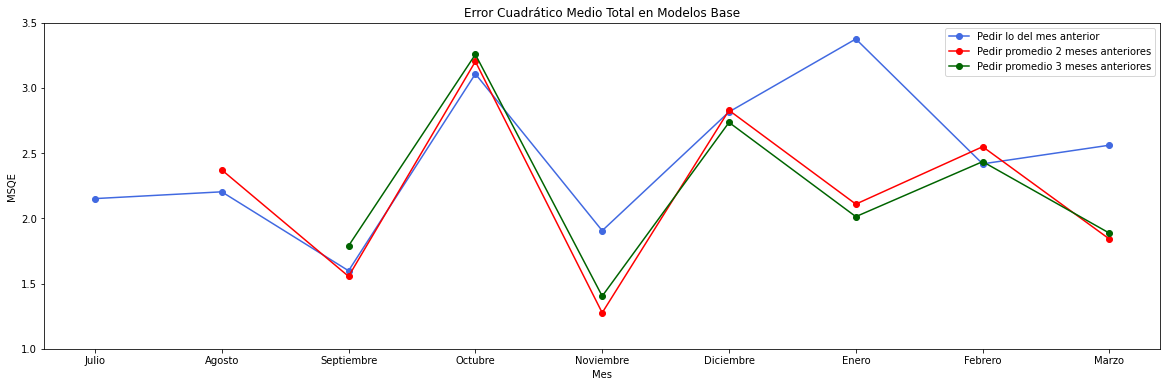

In [36]:
ptl.figure(figsize=(20,6)) #impresión de la figura
ptl.plot(mesq.Mes, mesq.mesq_pedir_anterior,'-o',color="royalblue")
ptl.plot(mesq.Mes, mesq.mesq_promedio_2_meses_anteriores, '-o', color="red")
ptl.plot(mesq.Mes, mesq.mesq_promedio_3_meses_anteriores, '-o', color="darkgreen")
ptl.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
ptl.ylim(1, 3.5)
ptl.ylabel('MSQE')
ptl.xlabel('Mes')
ptl.title('Error Cuadrático Medio Total en Modelos Base')
#-p une puntos con lineas
#azul menos 
